<a href="https://colab.research.google.com/github/oznurcet/algoritma/blob/main/Global_AI_Hub_Regresyon_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as R2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [63]:
#Load the dataset to the project with the help of read_csv() and observe the first 5 columns

data=pd.read_csv('/Melbourne_housing_FULL.csv')
data_copy=data.copy()
data_copy.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [64]:
'''
Show the information of the dataset, which contains the number of columns, column
labels, column data types, memory usage, range index, and the number of cells in
each column (non-null values)
'''

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [65]:
#Find the shape, number of columns and size of the dataset

print(f'Shape   :{data_copy.shape}\n'
      f'Size   :{data_copy.size}\n'
      f'Dimension   :{data_copy.ndim}\n')

Shape   :(34857, 21)
Size   :731997
Dimension   :2



In [66]:
#Examine the descriptive statistics of dataset

data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [67]:
data_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [68]:
'''
The values of some variables are given as objects. At the same time, we observe
that there are also categorical values. This might give us trouble when examining the
dataset. Therefore, in such cases, we need to define the variables categorically
'''

cat_cols=['Type','Method','Regionname']
num_cols=['Suburb','Address','Rooms','Price','SellerG',
          'Date','Distance','Postcode','Bedroom2',
          'Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Propertycount']

In [69]:
#Check for duplicate data. If there are duplicate data, clear them from the dataset

data_copy.duplicated().sum()

1

In [70]:
data_copy.loc[data_copy.duplicated(keep=False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [71]:
data_copy.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [72]:
#Find and remove the missing values on the dataset
data_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [73]:
data_copy.Price.fillna(data_copy.Price.mean(),inplace=True)

null_column= ['Distance','Postcode','Bedroom2','Bathroom','Car',
              'Landsize','BuildingArea','YearBuilt','CouncilArea',
              'Lattitude','Longtitude','Regionname','Propertycount']

for column in null_column:
  data_copy[column] = data_copy[column].fillna(data_copy[column].mode().iloc[0])



In [83]:
#Clear outlier data in the dataset.

Price_mean=data_copy['Price'].mean()
Price_mean

Price_std=data_copy['Price'].std()
Price_std



threshold = 3
outlier = []
for i in data_copy ['Price']:
    z = (i-Price_mean)/Price_std
    if z >= threshold:
        outlier.append(i)
        df = data_copy[~data_copy.Price.isin(outlier)]




650


In [85]:
print(len(outlier))

650


In [84]:
print(f'Shape   :{df.shape}\n'
      f'Size   :{df.size}\n'
      f'Dimension   :{df.ndim}\n')

Shape   :(34207, 21)
Size   :718347
Dimension   :2



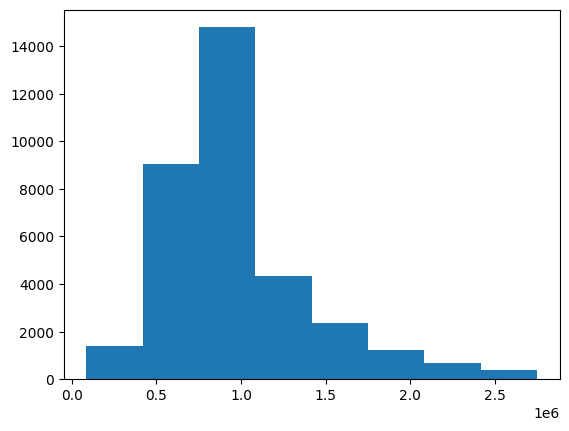

In [89]:
 #Build a Histogram to visualize price distribution

plt.hist(df.Price,bins=8,
         histtype='bar',
         label='Price Distribution')

plt.show()


In [95]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


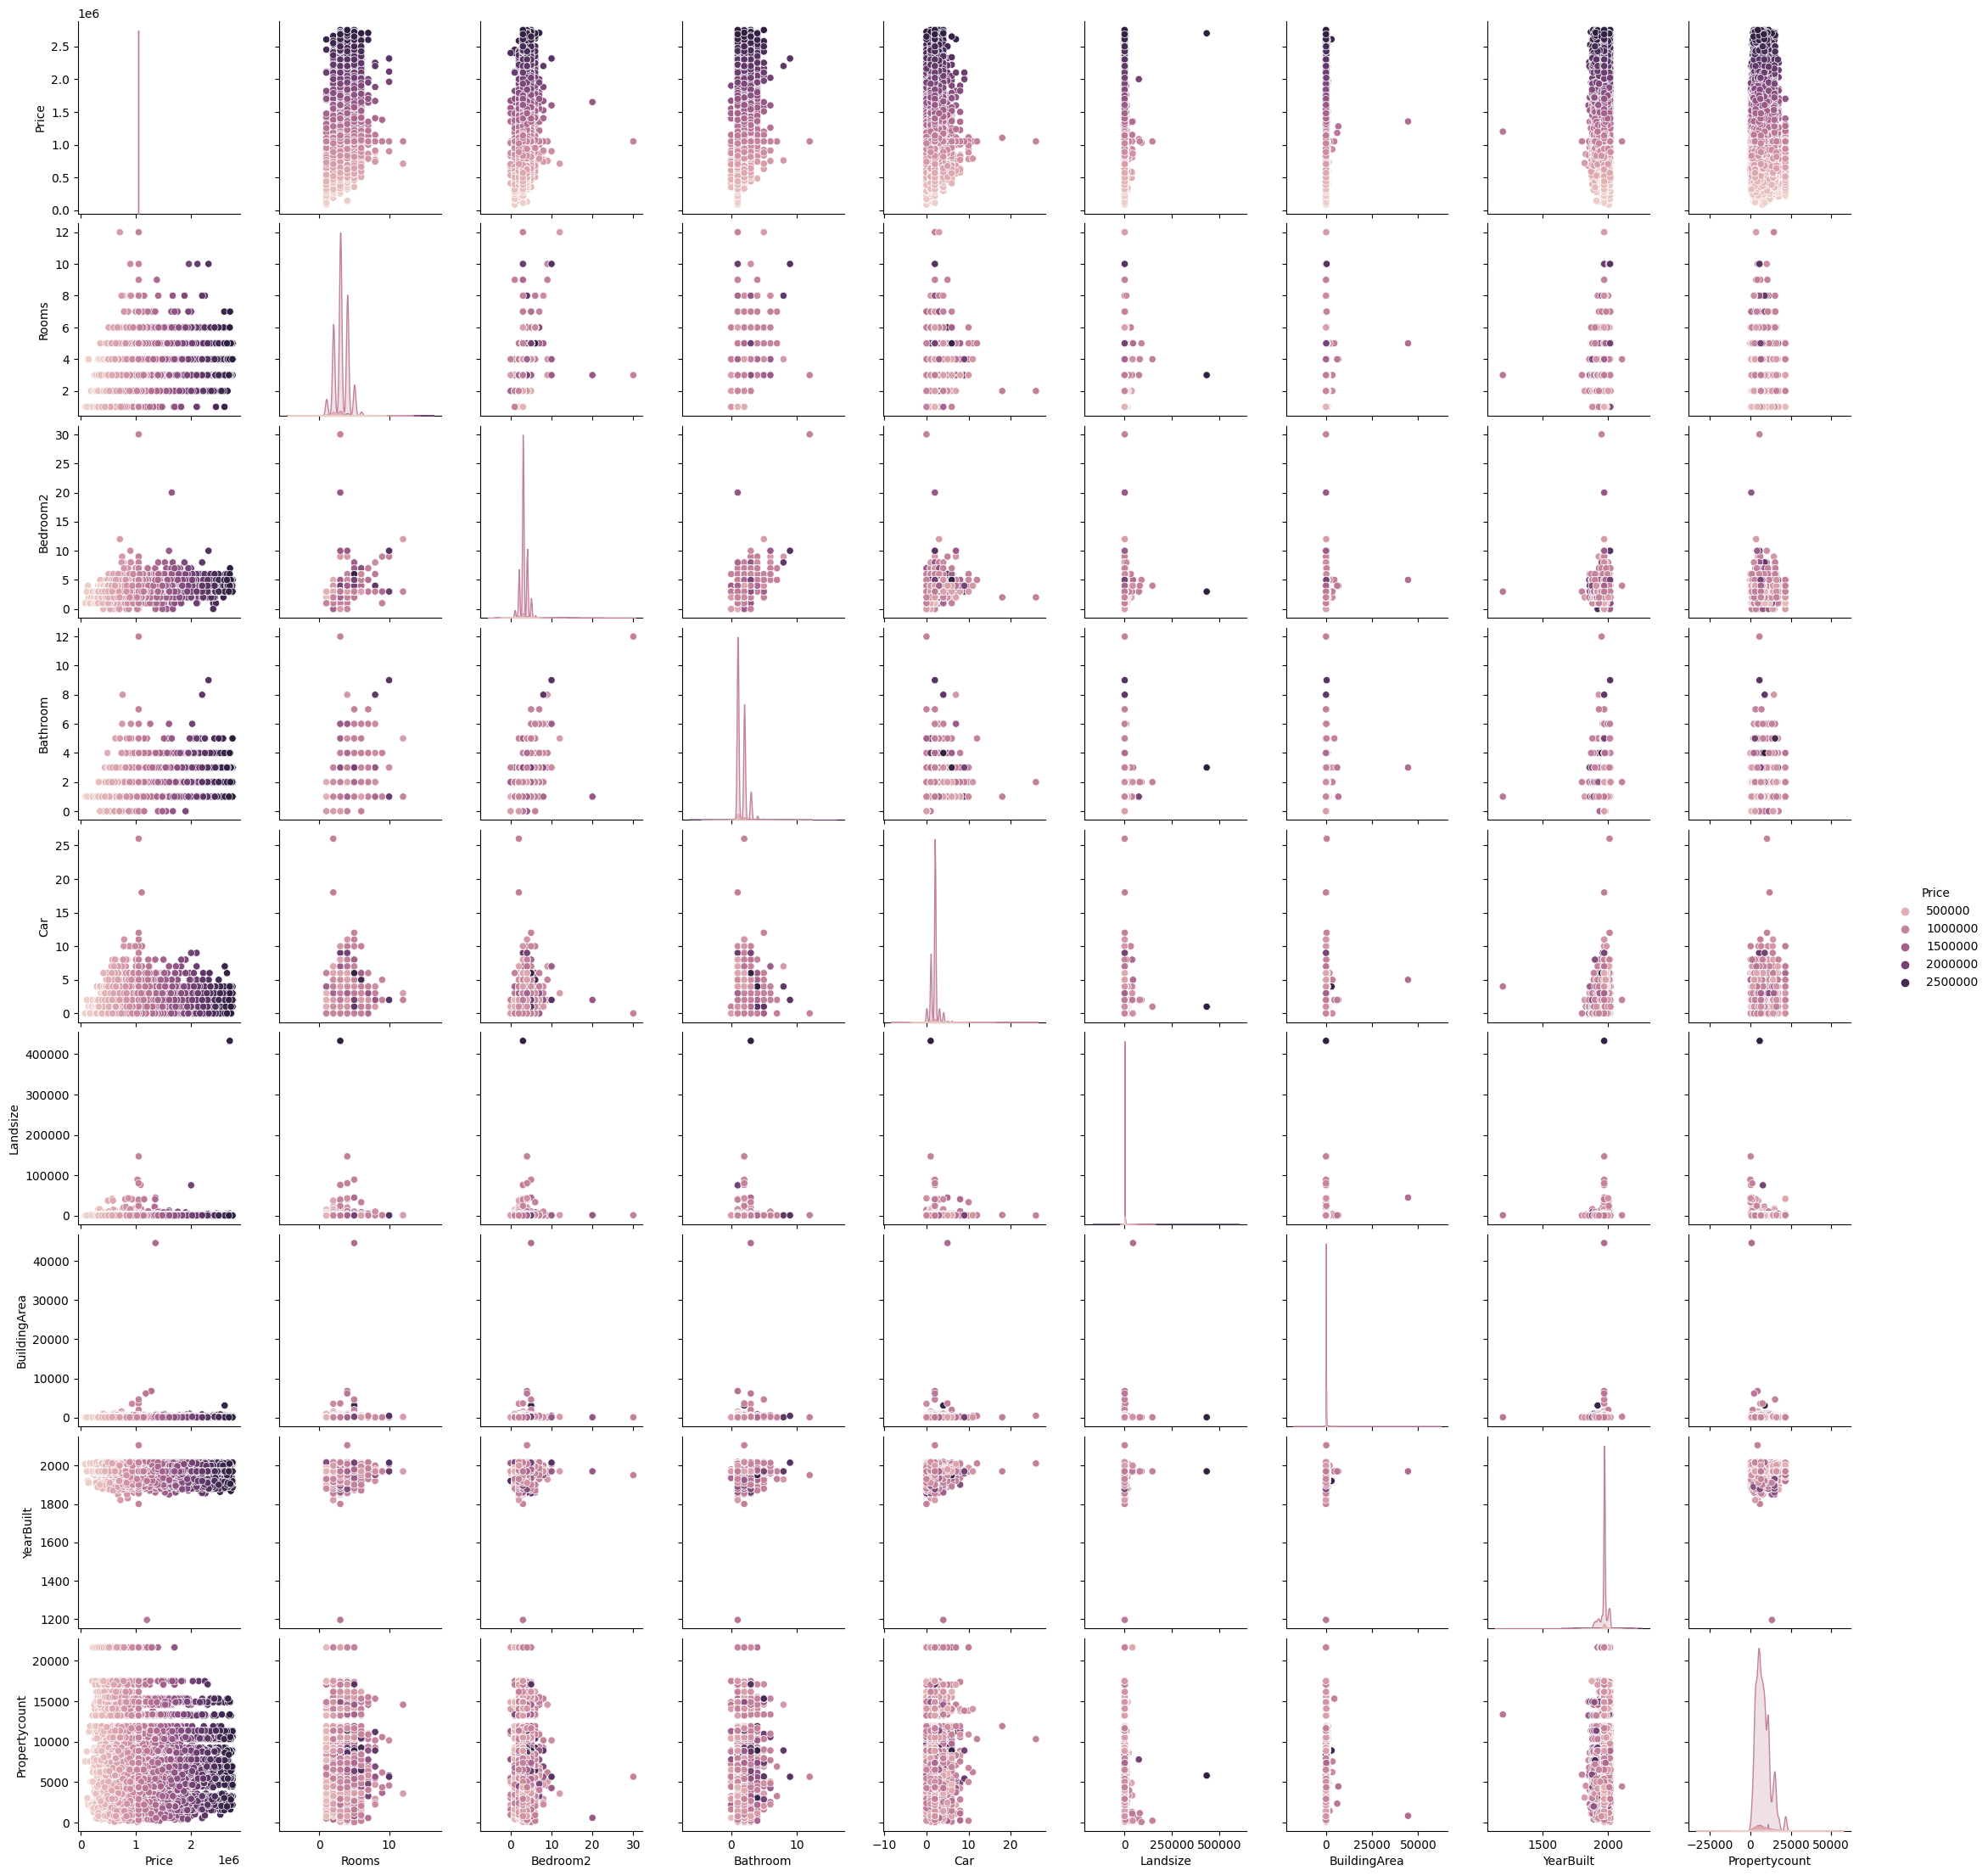

In [97]:
#Draw a pair plot to see the relationship between all numerical variables and the price variable.

sns.pairplot(df,vars=['Price','Rooms','Bedroom2',
          'Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount'],hue='Price')

<ipython-input-98-85967c343b00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

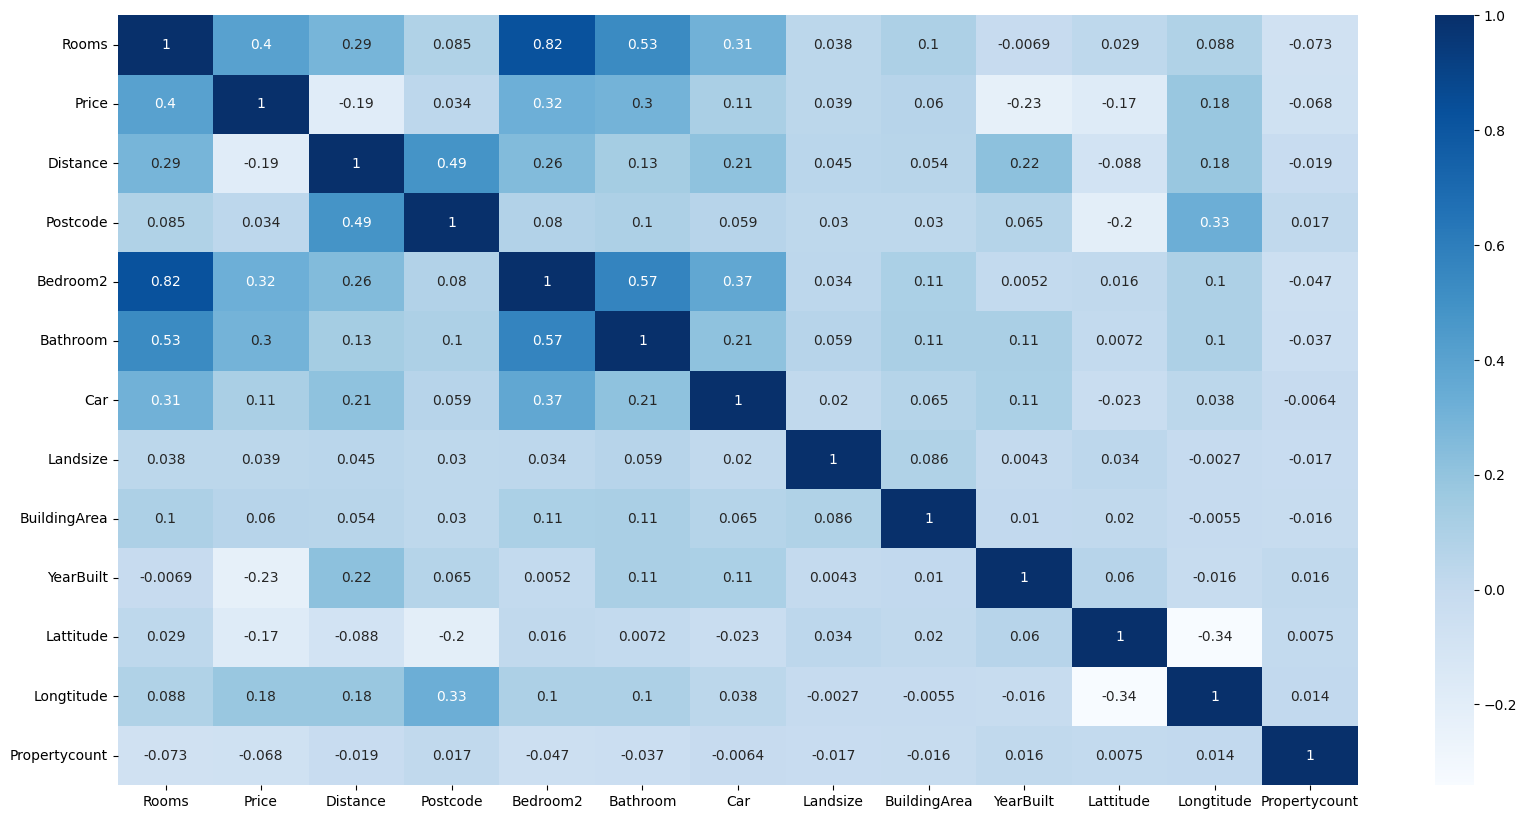

In [98]:
 #Draw a correlation matrix by using a heatmap on seaborn

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [101]:
 #Implement Label Encoder and One Hot encoder for categorical variables

le = LabelEncoder()
ohe=ColumnTransformer([("Type",OneHotEncoder(),[1])], remainder='passthrough')
df['Type'] = le.fit_transform(df['Type'])

le = LabelEncoder()
ohe=ColumnTransformer([("Method",OneHotEncoder(),[2])], remainder='passthrough')
df['Method'] = le.fit_transform(df['Method'])

le = LabelEncoder()
ohe=ColumnTransformer([("Regionname",OneHotEncoder(),[3])], remainder='passthrough')
df['Regionname'] = le.fit_transform(df['Regionname'])

df.head()



<ipython-input-101-f9d7468e1ffc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = le.fit_transform(df['Type'])
<ipython-input-101-f9d7468e1ffc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Method'] = le.fit_transform(df['Method'])
<ipython-input-101-f9d7468e1ffc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,0,1.050173e+06,6,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,120.0,1970.0,Yarra City Council,-37.8014,144.9958,2,4019.0
1,Abbotsford,85 Turner St,2,0,1.480000e+06,2,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,120.0,1970.0,Yarra City Council,-37.7996,144.9984,2,4019.0
2,Abbotsford,25 Bloomburg St,2,0,1.035000e+06,2,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,2,4019.0
3,Abbotsford,18/659 Victoria St,3,2,1.050173e+06,7,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,120.0,1970.0,Yarra City Council,-37.8114,145.0116,2,4019.0
4,Abbotsford,5 Charles St,3,0,1.465000e+06,5,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,2,4019.0


In [114]:

#Model Trainig

y = df[['Price']]

x = df[['Rooms','Type','Method','Regionname','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']]


x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.33, random_state= 0)

print("The dimension of X_train is {}".format(x_train.shape))
print("The dimension of X_test is {}".format(x_test.shape))

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

The dimension of X_train is (22918, 12)
The dimension of X_test is (11289, 12)


In [130]:
#Lasso

model_Lasso= Lasso(alpha=1.0)
model_Lasso.fit(X_train,y_train)

y_pred=model_Lasso.predict(X_test)



In [139]:
# calculate MAE
MAE = mae(y_test, y_pred)

# calculate MSE

MSE = mse(y_test, y_pred)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

#R2 = R2(y_test, y_pred)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))


MAE : 265958.11008936
MSE : 120036491884.96461
RMSE : 346462.829009065
R2 : 0.3349451950836402


In [149]:
# LinearRegression




linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred2 = linear.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred2)

# calculate MSE

MSE = mse(y_test, y_pred2)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred2)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))


MAE : 265958.2274826979
MSE : 120036489592.69037
RMSE : 346462.82570095506
R2 : 0.33494520778384473


In [151]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

y_pred3 = ridgeReg.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred3)

# calculate MSE

MSE = mse(y_test, y_pred3)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred3)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))


MAE : 265949.8951996229
MSE : 120034761778.52936
RMSE : 346460.3321861384
R2 : 0.3349547806319989


In [153]:
#ElasticNet Model


enet = ElasticNet(alpha=0.5, l1_ratio=0.5)

enet.fit(X_train, y_train)

y_pred4 = enet.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred4)

# calculate MSE

MSE = mse(y_test, y_pred4)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred4)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))



MAE : 265270.69373756484
MSE : 121711920277.29272
RMSE : 348872.3552781056
R2 : 0.3256625870607488


In [156]:
#KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred5 = neigh.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred5)

# calculate MSE

MSE = mse(y_test, y_pred5)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred5)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))


MAE : 241323.09193907428
MSE : 119339210040.67566
RMSE : 345455.0767331053
R2 : 0.3388084422815816


In [159]:
#RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred6 = regr.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred6)

# calculate MSE

MSE = mse(y_test, y_pred6)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred6)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))

<ipython-input-159-e386bccb07e8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


MAE : 287857.5665136882
MSE : 142673369056.8278
RMSE : 377721.2848871874
R2 : 0.20952696855069042


In [161]:
#GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred7 = reg.predict(X_test)

# calculate MAE
MAE = mae(y_test, y_pred7)

# calculate MSE

MSE = mse(y_test, y_pred7)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred7)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE : 216217.65200901125
MSE : 83733964867.54027
RMSE : 289368.2167542598
R2 : 0.5360771145892629


In [163]:
#AdaBoostRegressor

Aregr = AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
Aregr.fit(X_train, y_train)

y_pred8 = Aregr.predict(X_test)

MAE = mae(y_test, y_pred8)

# calculate MSE

MSE = mse(y_test, y_pred8)

# calculate RMSE

RMSE = math.sqrt(MSE)

# calculate R2

R2 = R2(y_test, y_pred8)

print("MAE : " + str(MAE))
print("MSE : " + str(MSE))
print("RMSE : " + str(RMSE))
print("R2 : " + str(R2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE : 276783.1733913398
MSE : 117111784409.80461
RMSE : 342215.99087389914
R2 : 0.3511493570745954
